In [403]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os

In [419]:
dir_name = "../output"
gt_dir = "../data/test5"
gt_files = os.listdir(gt_dir)
print(gt_files)
files = os.listdir(dir_name)
print(files)
data = []
for file in files:
    with open(os.path.join(dir_name, file), 'r') as f:
        data.append(eval(f.read()))


['output.avi', 'output.txt']
['ORB_Clear5.txt', 'ORB_Clear2.txt', 'Flow_Clear2.txt', 'ORB_Clear4.txt']


In [420]:
dfs= []

for experiment in data:
    df = pd.DataFrame(experiment, columns=["x", "y", "x_gt", "y_gt", "l2"])
    dfs.append(df)


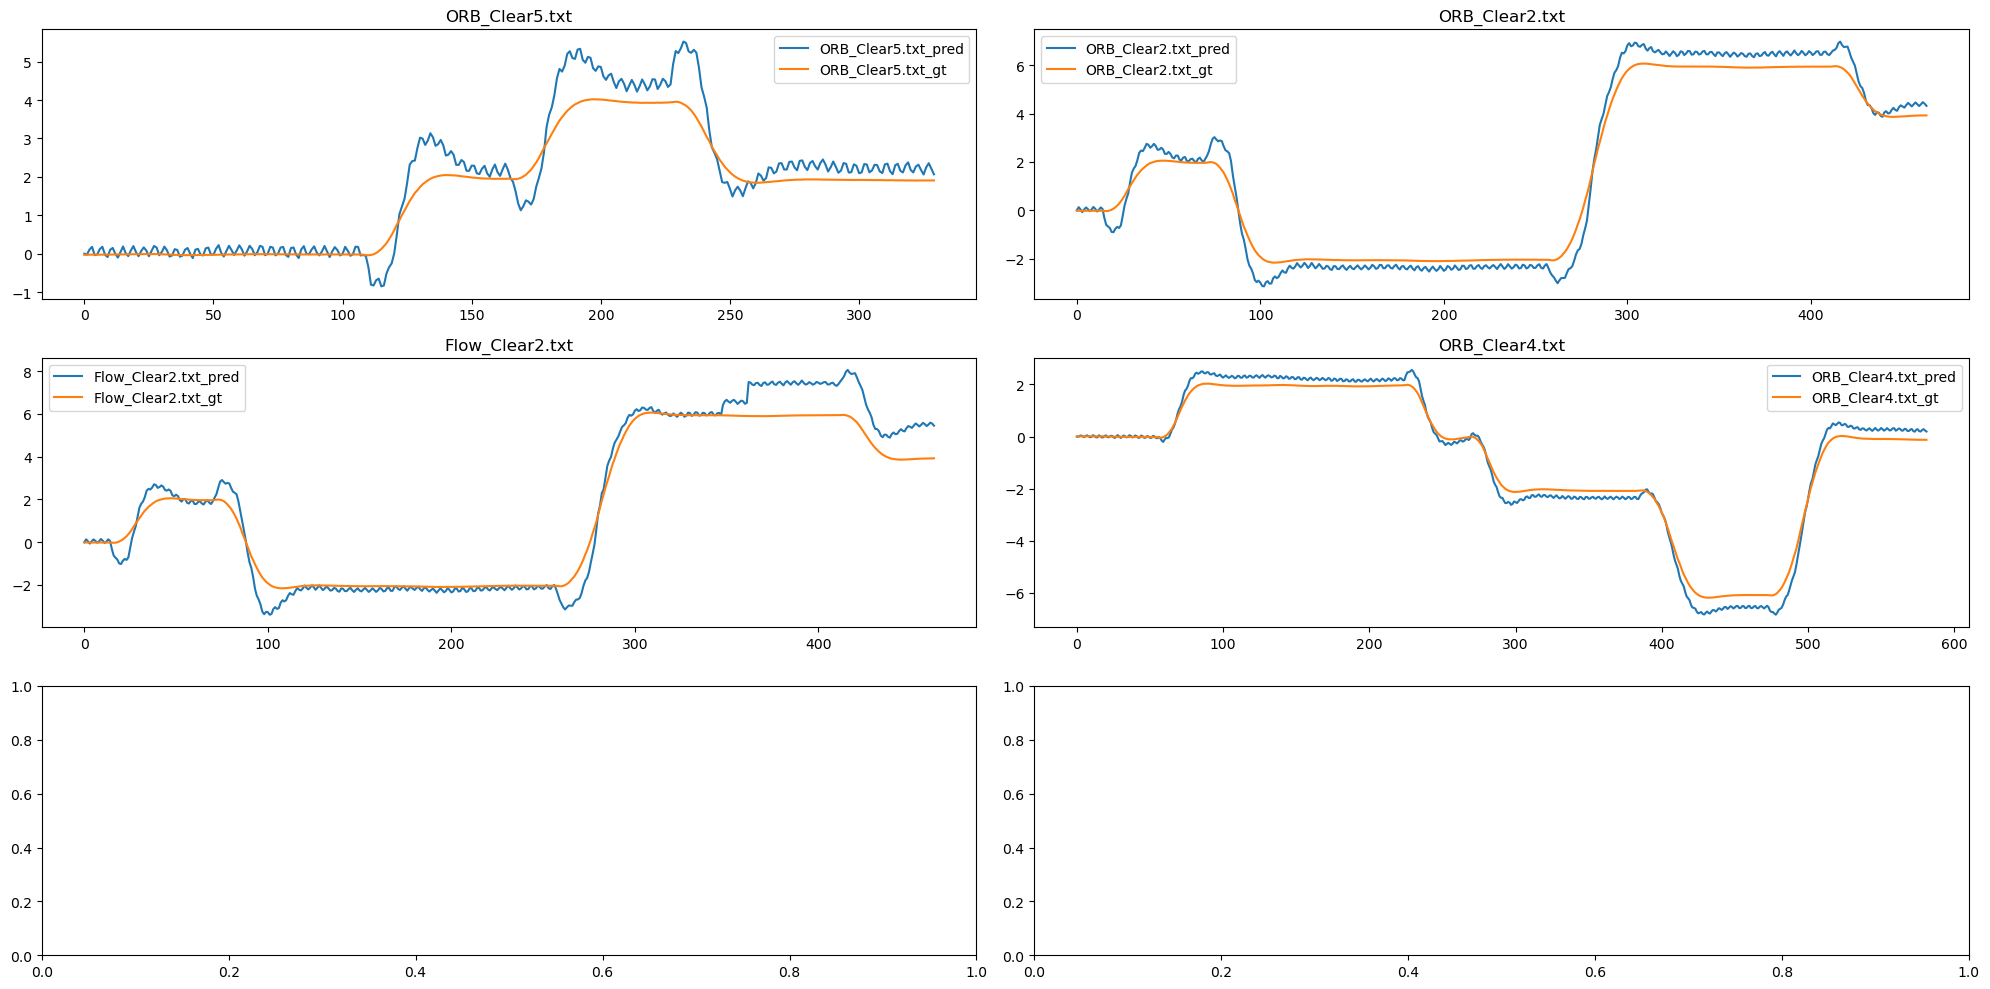

In [421]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    ax = axes[i // 2, i % 2]
    ax.plot(t, df["x"].to_numpy(), label=f"{files[i]}_pred")
    ax.plot(t, df["x_gt"].to_numpy(), label=f"{files[i]}_gt")
    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

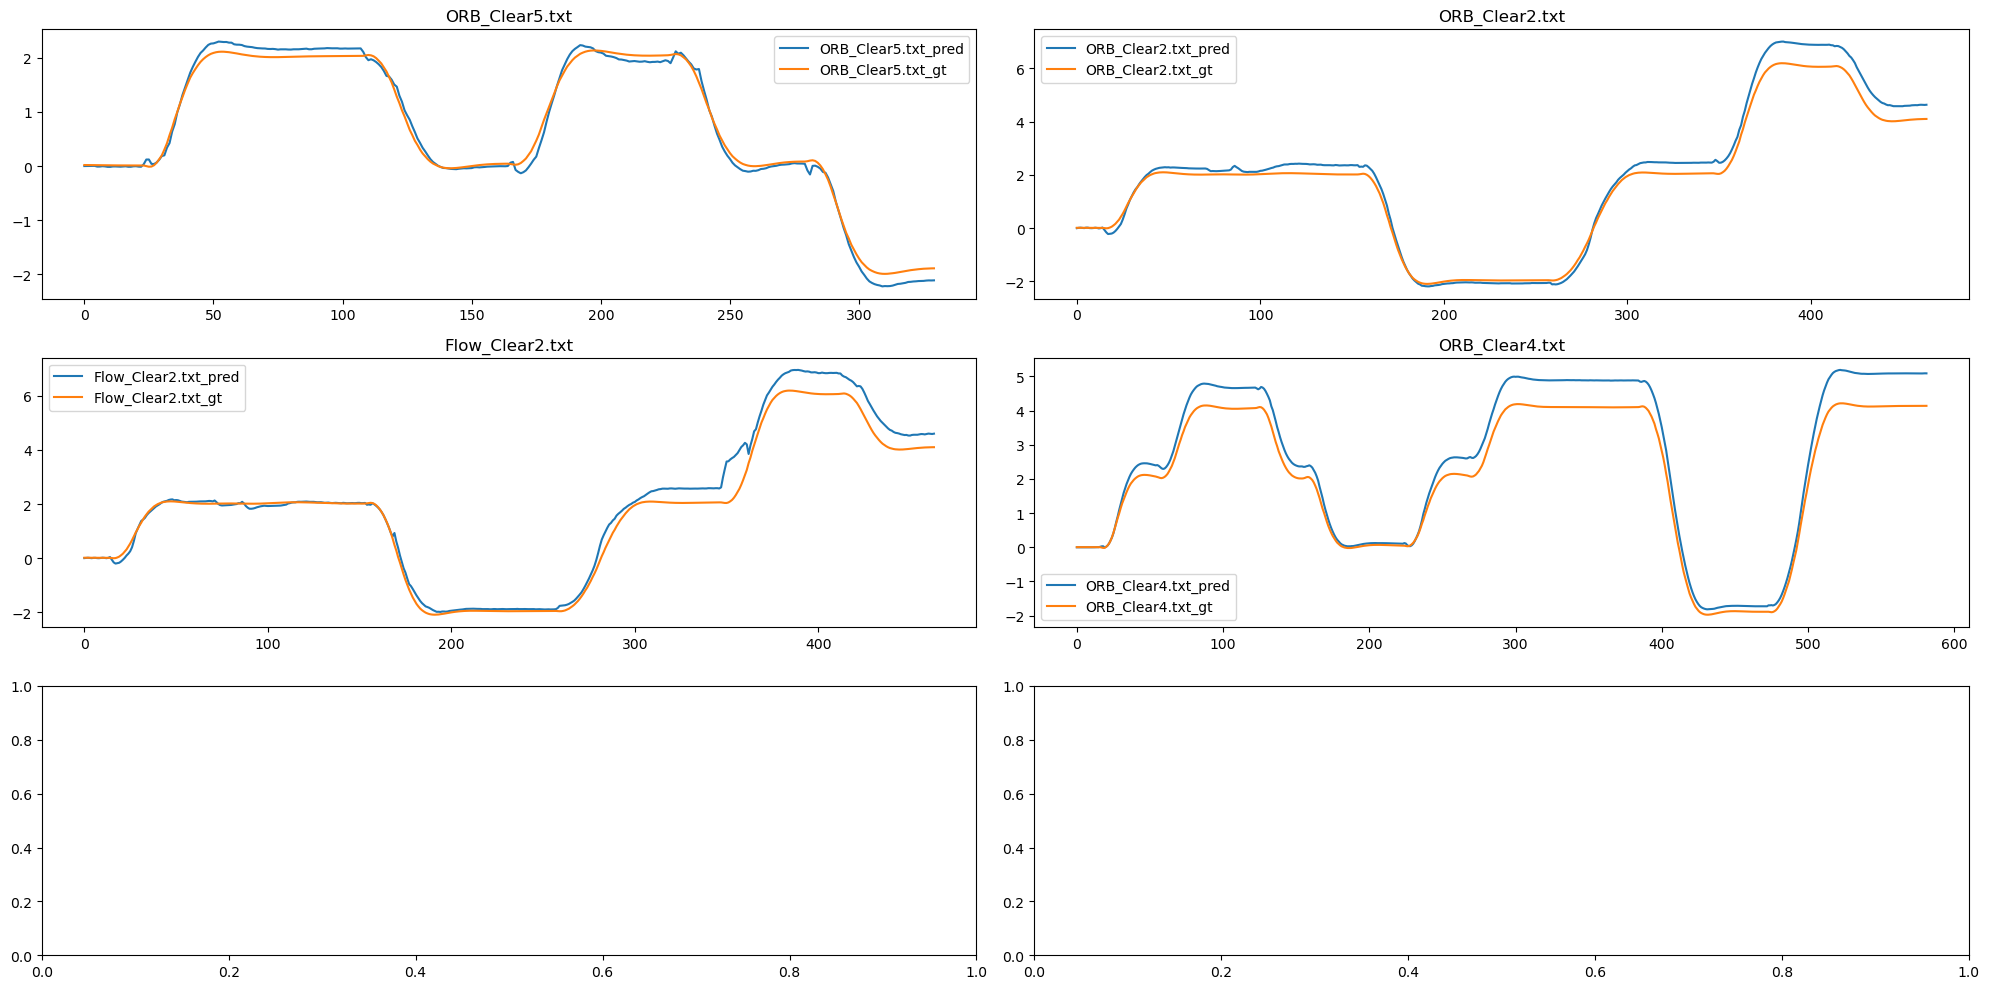

In [422]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    ax = axes[i // 2, i % 2]
    ax.plot(t, df["y"].to_numpy(), label=f"{files[i]}_pred")
    ax.plot(t, df["y_gt"].to_numpy(), label=f"{files[i]}_gt")
    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

ORB_Clear5.txt 0.3033717747981007 0.015537179754016164 0.4328004272727273
ORB_Clear2.txt 0.319309609150854 0.1588973624478885 0.6226478103448276
Flow_Clear2.txt 0.7186483719034185 0.19283928752409335 0.726489275862069
ORB_Clear4.txt 0.11839444754368658 0.33222157778962896 0.6110356632302405


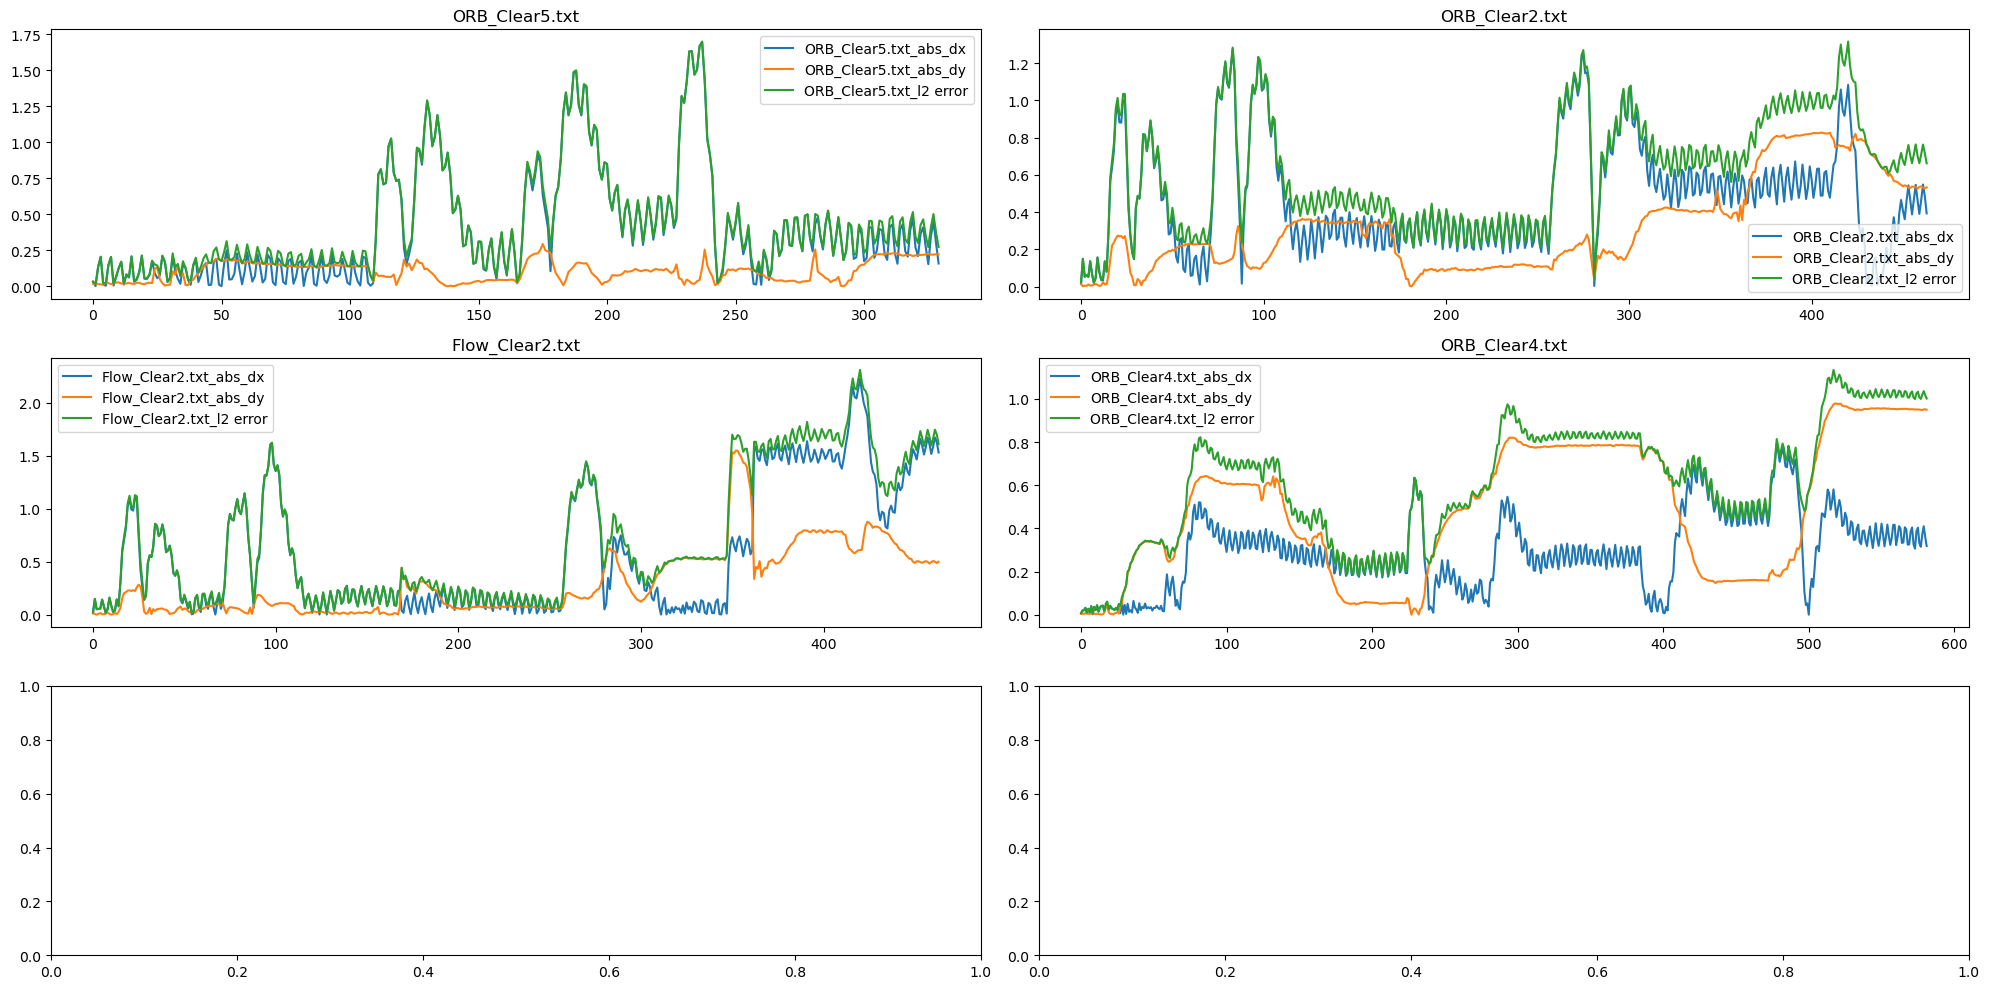

In [423]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    dx  = np.abs(df["x"].to_numpy() - df["x_gt"].to_numpy())
    dy  = np.abs(df["y"].to_numpy() - df["y_gt"].to_numpy())
    ax = axes[i // 2, i % 2]
    ax.plot(t, dx, label=f"{files[i]}_abs_dx")
    ax.plot(t, dy, label=f"{files[i]}_abs_dy")
    ax.plot(t, df["l2"].to_numpy(), label=f"{files[i]}_l2 error")

    mse_x = np.mean(np.square(dx))
    mse_y = np.mean(np.square(dy))
    print(files[i], mse_x.mean(), mse_y.mean(), df["l2"].mean())

    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

ORB_Clear5.txt finall err: 0.2733921384915812, avg err: 0.43280045547201423
ORB_Clear2.txt finall err: 0.6618764430171237, avg err: 0.622647754143035
ORB_Clear4.txt finall err: 1.0023202692956978, avg err: 0.6110355790468327


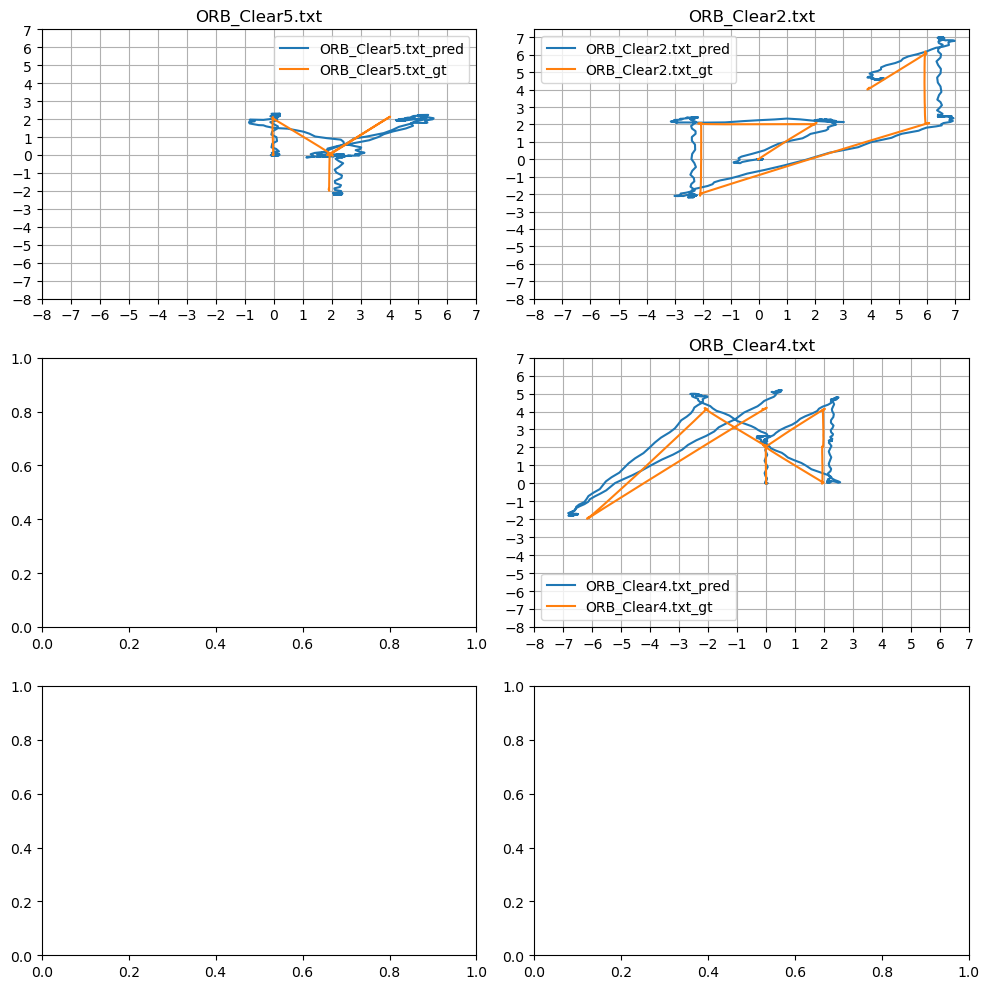

In [425]:
fig, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(10, 10))

for i, df in enumerate(dfs):
    if files[i].startswith("Flow"):
        continue
    ax = axes[i // 2, i % 2]
    ax.plot(df["x"].to_numpy(), df["y"].to_numpy(), label=f"{files[i]}_pred")
    ax.plot(df["x_gt"].to_numpy(), df["y_gt"].to_numpy(), label=f"{files[i]}_gt")
    euclidean = np.sqrt((df["x"].to_numpy() - df["x_gt"].to_numpy())**2 + (df["y"].to_numpy() - df["y_gt"].to_numpy())**2)
    print(f"{files[i]} finall err: {euclidean[-1]}, avg err: {euclidean.mean()}")
    ax.set_title(files[i])
    ax.set_xticks(np.arange(-8, 8, 1))
    ax.set_yticks(np.arange(-8, 8, 1))
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()


